Context Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

-Content What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too. What is a Fake News? Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas. For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.

-Workflow

In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

-Natural Language Processing Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing. In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.

-Dataset: There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We are combined both datasets using pandas built-in function.

Some Useful Links- 1-https://www.javatpoint.com/nlp 2-https://www.educative.io/answers/preprocessing-steps-in-natural-language-processing-nlp 3-https://www.youtube.com/watch?v=5ctbvkAMQO4 4-https://www.youtube.com/watch?v=X2vAabgKiuM

Let’s start

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("F:\Priti\data trained\True.csv")

In [3]:
df1

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
df2 = pd.read_csv("F:\Priti\data trained\Fake.csv")

In [5]:
df2

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
#To display data details 
print(df1)
print ('*'*100)

print(df1.head(10))
print ('*'*100)
print(df1.tail(10))
print ('*'*100)

print('The shape of the train dataset',df1.shape)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

In [7]:
#To display data details 
print(df2)
print ('*'*100)

print(df2.head(10))
print ('*'*100)
print(df2.tail(10))
print ('*'*100)

print('The shape of the train dataset',df2.shape)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [8]:
#Analyzing dataset
print(df1.isna().sum())
print ('*'*100)
print(df2.isna().sum())

title      0
text       0
subject    0
date       0
dtype: int64
****************************************************************************************************
title      0
text       0
subject    0
date       0
dtype: int64


In [9]:
#Analyzing dataset
print(df1.shape)
print ('*'*100)
print(df2.shape)

(21417, 4)
****************************************************************************************************
(23481, 4)


<AxesSubplot:>

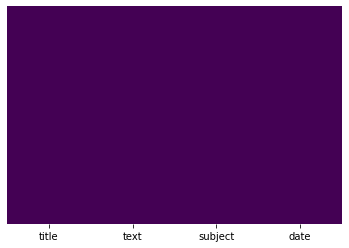

In [10]:
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:>

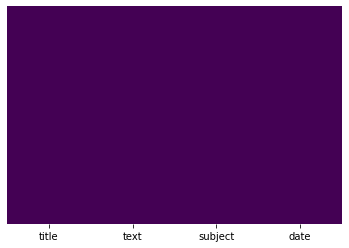

In [11]:
sns.heatmap(df2.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [12]:
# Getting information on the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [14]:
# To find the data type of the dataset
for col in df1:
    print ('This column', col ,'has', df1[col].nunique(),'unique elements')
    print ('*'*100)

This column title has 20826 unique elements
****************************************************************************************************
This column text has 21192 unique elements
****************************************************************************************************
This column subject has 2 unique elements
****************************************************************************************************
This column date has 716 unique elements
****************************************************************************************************


In [15]:
for col in df2:
    print ('This column', col ,'has', df2[col].nunique(),'unique elements')
    print ('*'*100)

This column title has 17903 unique elements
****************************************************************************************************
This column text has 17455 unique elements
****************************************************************************************************
This column subject has 6 unique elements
****************************************************************************************************
This column date has 1681 unique elements
****************************************************************************************************


In [16]:
df1.describe(include='all')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [17]:
df2.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [18]:
df1.drop(columns=['subject','date'], inplace=True)

In [19]:
df2.drop(columns=['subject','date'], inplace=True)

In [20]:
df1['Output']=1
df2['Output']=0
df1

,title,text,Output
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [21]:
df2

,title,text,Output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


Output 1 is for true news and 0 is for false or fake news.

In [22]:
df1['Input']=df1['title']+df1['text']
df1

,title,text,Output,Input
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,'Fully committed' NATO backs new U.S. approach...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,LexisNexis withdrew two products from Chinese ...
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,Minsk cultural hub becomes haven from authorit...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,Vatican upbeat on possibility of Pope Francis ...


In [23]:
df2['Input']=df2['title']+df2['text']
df2

,title,text,Output,Input
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,How to Blow $700 Million: Al Jazeera America F...


In [24]:
df1.drop(columns=['title','text'], inplace=True)
df1

,Output,Input
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
21412,1,'Fully committed' NATO backs new U.S. approach...
21413,1,LexisNexis withdrew two products from Chinese ...
21414,1,Minsk cultural hub becomes haven from authorit...
21415,1,Vatican upbeat on possibility of Pope Francis ...


In [25]:
df2.drop(columns=['title','text'], inplace=True)
df2

,Output,Input
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
23476,0,McPain: John McCain Furious That Iran Treated ...
23477,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,0,How to Blow $700 Million: Al Jazeera America F...


In [26]:
df=pd.concat([df1, df2], axis=0)

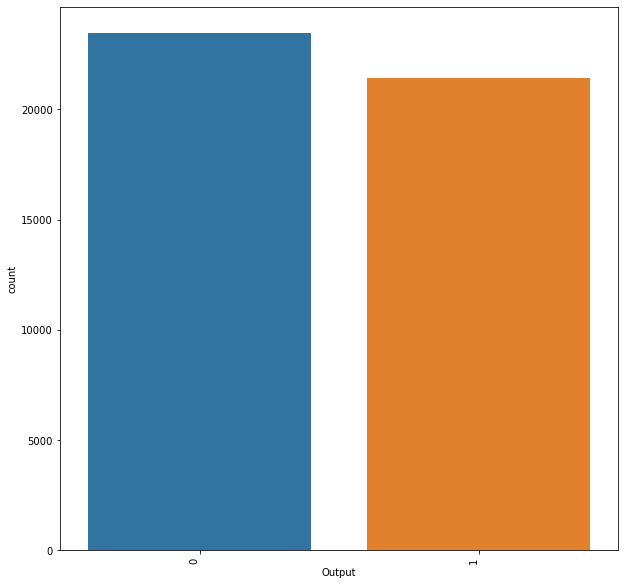

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(df['Output'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [28]:
(df['Output'].value_counts()/df.shape[0])*100

0    52.298543
1    47.701457
Name: Output, dtype: float64

The data are balanced.

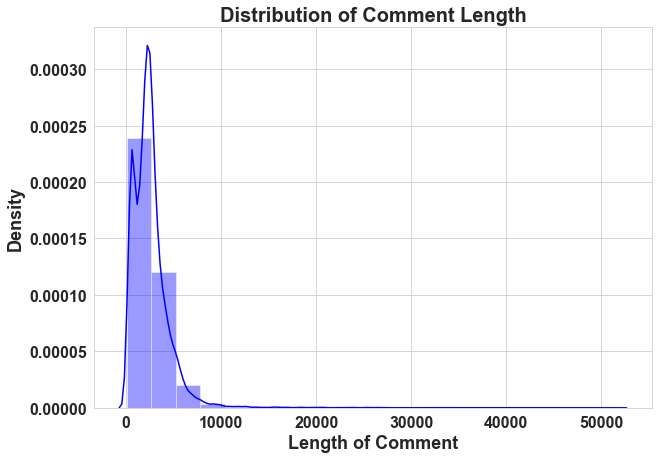

In [29]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df.Input.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [30]:
ham=df[df["Output"]==1]["Input"].describe()
spam=df[df["Output"]==0]["Input"].describe()

print("Ham Messege Length Description:\n",ham)
print("************************************")
print("Spam Message Length Description:\n",spam)

Ham Messege Length Description:
 count                                                 21417
unique                                                21197
top       Highlights: The Trump presidency on April 13 a...
freq                                                      8
Name: Input, dtype: object
************************************
Spam Message Length Description:
 count                                                 23481
unique                                                17908
top       ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TR...
freq                                                      4
Name: Input, dtype: object


# Data cleaning

In [31]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
from wordcloud import WordCloud

In [34]:
#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
#Replacing '\n' in comment_text
df['Input'] = df['Input'].replace('\n',' ')

In [36]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

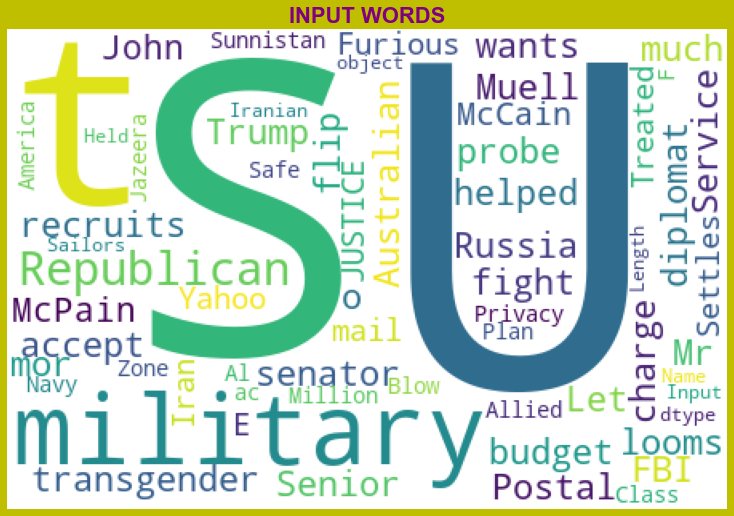

In [37]:
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='INPUT WORDS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

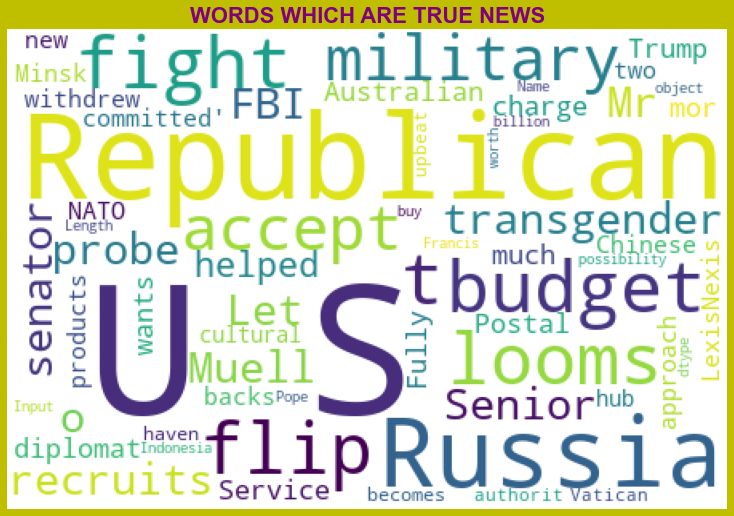

In [38]:
# Plotting for malignant
df_true=df[(df['Output']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_true['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS WHICH ARE TRUE NEWS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

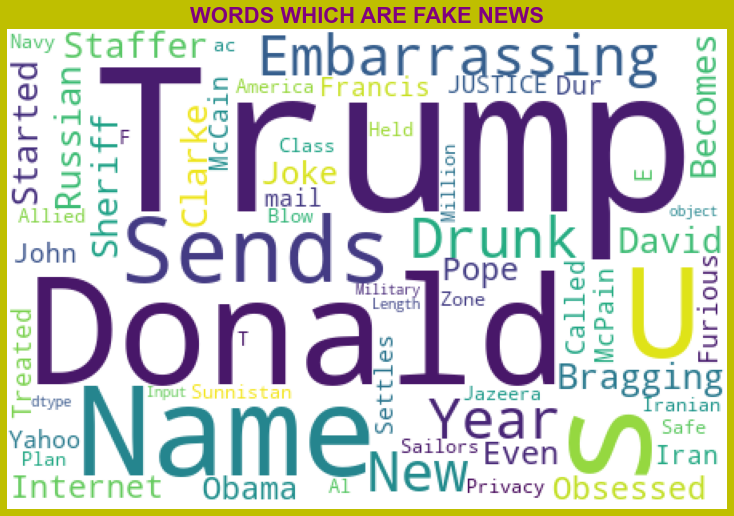

In [39]:
# Plotting for malignant
df_true=df[(df['Output']==0)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_true['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS WHICH ARE FAKE NEWS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

In [40]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [41]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
x = tf_vec.fit_transform(df['Input']).toarray()

In [42]:
y=df['Output']

In [43]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [44]:
import timeit, sys
import tqdm.notebook as tqdm

In [45]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20, random_state=42)
re=BernoulliNB()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.031959910913140314
	Accuracy Score: 0.9680400890868597
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4650
           1       0.97      0.97      0.97      4330

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980


327

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20, random_state=42)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.02683741648106904
	Accuracy Score: 0.9731625835189309
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4650
           1       0.97      0.98      0.97      4330

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980


327

In [49]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20, random_state=50)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.012806236080178173
	Accuracy Score: 0.9871937639198218
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4723
           1       0.99      0.99      0.99      4257

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


327

# Conclusion

MLPClassifier is best as Hamming Loss  : 0.012806236080178173 & Accuracy Score: 0.9871937639198218.